<a href="https://colab.research.google.com/github/klmahalakshmi0102/Movie_Genre_Prediction/blob/master/Movie_Genre_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
pd.set_option('display.max_colwidth', 300)


In [3]:
meta = pd.read_csv("movie.metadata.tsv", sep = '\t', header = None)
meta.head()

0           1  \
0    975900   /m/03vyhn   
1   3196793   /m/08yl5d   
2  28463795  /m/0crgdbh   
3   9363483  /m/0285_cd   
4    261236   /m/01mrr1   

                                                       2           3  \
0                                         Ghosts of Mars  2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey Mystery  2000-02-16   
2                                            Brun bitter        1988   
3                                       White Of The Eye        1987   
4                                      A Woman in Flames        1983   

            4      5                                   6  \
0  14010832.0   98.0  {"/m/02h40lc": "English Language"}   
1         NaN   95.0  {"/m/02h40lc": "English Language"}   
2         NaN   83.0  {"/m/05f_3": "Norwegian Language"}   
3         NaN  110.0  {"/m/02h40lc": "English Language"}   
4         NaN  106.0   {"/m/04306rv": "German Language"}   

                                           7  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                     {"/m/05b4w": "Norway"}   
3             {"/m/07ssc": "United Kingdom"}   
4                    {"/m/0345h": "Germany"}   

                                                                                                                                                                                            8  
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}  
1                                                                              {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biographical film", "/m/07s9rl0": "Drama", "/m/0hj3n01": "Crime Drama"}  
2                                                                                                                                        {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama"}  
3                                                                                            {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic thriller", "/m/09blyk": "Psychological thriller"}  
4                                                                                                                                                                     {"/m/07s9rl0": "Drama"}

In [4]:
meta.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]
meta.head()

movie_id           1  \
0    975900   /m/03vyhn   
1   3196793   /m/08yl5d   
2  28463795  /m/0crgdbh   
3   9363483  /m/0285_cd   
4    261236   /m/01mrr1   

                                              movie_name           3  \
0                                         Ghosts of Mars  2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey Mystery  2000-02-16   
2                                            Brun bitter        1988   
3                                       White Of The Eye        1987   
4                                      A Woman in Flames        1983   

            4      5                                   6  \
0  14010832.0   98.0  {"/m/02h40lc": "English Language"}   
1         NaN   95.0  {"/m/02h40lc": "English Language"}   
2         NaN   83.0  {"/m/05f_3": "Norwegian Language"}   
3         NaN  110.0  {"/m/02h40lc": "English Language"}   
4         NaN  106.0   {"/m/04306rv": "German Language"}   

                                           7  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                     {"/m/05b4w": "Norway"}   
3             {"/m/07ssc": "United Kingdom"}   
4                    {"/m/0345h": "Germany"}   

                                                                                                                                                                                        genre  
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}  
1                                                                              {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biographical film", "/m/07s9rl0": "Drama", "/m/0hj3n01": "Crime Drama"}  
2                                                                                                                                        {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama"}  
3                                                                                            {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic thriller", "/m/09blyk": "Psychological thriller"}  
4                                                                                                                                                                     {"/m/07s9rl0": "Drama"}

In [5]:
plots=[]
with open("plot_summaries.txt",'r',encoding='utf-8') as f:
  reader=csv.reader(f,dialect='excel-tab')
  for row in tqdm(reader):
    plots.append(row)

9787it [00:00, 39923.26it/s]


In [6]:

movie_id=[]
plot=[]

for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

movies=pd.DataFrame({'movie_id':movie_id,'plot':plot})

100%|██████████| 9787/9787 [00:00<00:00, 606561.46it/s]


In [7]:
movies.head()

movie_id  \
0  23890098   
1  31186339   
2  20663735   
3   2231378   
4    595909   

                                                                                                                                                                                                                                                                                                          plot  
0                                                                                                                           Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.  
1  The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...  
2  Poovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had e...  
3  The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...  
4  Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...

In [8]:
meta.dtypes

movie_id        int64
1              object
movie_name     object
3              object
4             float64
5             float64
6              object
7              object
genre          object
dtype: object

In [9]:


meta['movie_id']=meta['movie_id'].astype(str)
movies=pd.merge(movies,meta[['movie_id','movie_name','genre']],on='movie_id')
movies.head()


movie_id  \
0  23890098   
1  31186339   
2  20663735   
3   2231378   
4    595909   

                                                                                                                                                                                                                                                                                                          plot  \
0                                                                                                                           Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.   
1  The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...   
2  Poovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had e...   
3  The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...   
4  Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...   

           movie_name  \
0          Taxi Blues   
1    The Hunger Games   
2          Narasimham   
3  The Lemon Drop Kid   
4   A Cry in the Dark   

                                                                                                                                          genre  
0                                                                                          {"/m/07s9rl0": "Drama", "/m/03q4nz": "World cinema"}  
1                              {"/m/03btsm8": "Action/Adventure", "/m/06n90": "Science Fiction", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama"}  
2                                               {"/m/04t36": "Musical", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama", "/m/01chg": "Bollywood"}  
3                                                                                        {"/m/06qm3": "Screwball comedy", "/m/01z4y": "Comedy"}  
4  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama", "/m/01f9r0": "Docudrama", "/m/03q4nz": "World cinema", "/m/05bh16v": "Courtroom Drama"}

In [10]:
genres=[]
for i in movies['genre']:
  genres.append(list(json.loads(i).values()))
movies['genre_new'] = genres

In [11]:
genres

[['Drama', 'World cinema'],
 ['Action/Adventure', 'Science Fiction', 'Action', 'Drama'],
 ['Musical', 'Action', 'Drama', 'Bollywood'],
 ['Screwball comedy', 'Comedy'],
 ['Crime Fiction', 'Drama', 'Docudrama', 'World cinema', 'Courtroom Drama'],
 ['Thriller', 'Action/Adventure', 'Action', 'Drama'],
 ['Thriller', 'Drama', 'Horror'],
 ['Drama', 'Teen'],
 ['Romantic comedy',
  'Media Satire',
  'Americana',
  'Comedy-drama',
  'Black-and-white',
  'Drama',
  'Comedy',
  'Romance Film'],
 ['Short Film', 'Family Film', 'Animation'],
 ['Comedy'],
 ['Crime Fiction', 'Drama', 'Comedy', 'World cinema'],
 ['Parody', 'Comedy'],
 ['War film',
  'Epic',
  'Action/Adventure',
  'Period piece',
  'Drama',
  'Film adaptation',
  'Action',
  'Political drama'],
 ['Cult', 'Coming of age', 'Comedy', 'Teen'],
 ['Horror'],
 ['Thriller', 'Mystery', 'Comedy film', 'Crime Fiction', 'Horror'],
 ['Drama'],
 ['Thriller',
  'Crime Fiction',
  'Indie',
  'Martial Arts Film',
  'Romance Film',
  'Action'],
 ['Period

In [12]:
movies_new = movies[~(movies['genre_new'].str.len() == 0)]

In [13]:
movies_new.shape, movies.shape

((9663, 5), (9764, 5))

In [14]:
movies.head()

movie_id  \
0  23890098   
1  31186339   
2  20663735   
3   2231378   
4    595909   

                                                                                                                                                                                                                                                                                                          plot  \
0                                                                                                                           Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.   
1  The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...   
2  Poovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had e...   
3  The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...   
4  Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...   

           movie_name  \
0          Taxi Blues   
1    The Hunger Games   
2          Narasimham   
3  The Lemon Drop Kid   
4   A Cry in the Dark   

                                                                                                                                          genre  \
0                                                                                          {"/m/07s9rl0": "Drama", "/m/03q4nz": "World cinema"}   
1                              {"/m/03btsm8": "Action/Adventure", "/m/06n90": "Science Fiction", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama"}   
2                                               {"/m/04t36": "Musical", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama", "/m/01chg": "Bollywood"}   
3                                                                                        {"/m/06qm3": "Screwball comedy", "/m/01z4y": "Comedy"}   
4  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama", "/m/01f9r0": "Docudrama", "/m/03q4nz": "World cinema", "/m/05bh16v": "Courtroom Drama"}   

                                                          genre_new  
0                                             [Drama, World cinema]  
1                [Action/Adventure, Science Fiction, Action, Drama]  
2                               [Musical, Action, Drama, Bollywood]  
3                                        [Screwball comedy, Comedy]  
4  [Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]

In [15]:
all_genres = sum(genres,[])
all_genres

['Drama',
 'World cinema',
 'Action/Adventure',
 'Science Fiction',
 'Action',
 'Drama',
 'Musical',
 'Action',
 'Drama',
 'Bollywood',
 'Screwball comedy',
 'Comedy',
 'Crime Fiction',
 'Drama',
 'Docudrama',
 'World cinema',
 'Courtroom Drama',
 'Thriller',
 'Action/Adventure',
 'Action',
 'Drama',
 'Thriller',
 'Drama',
 'Horror',
 'Drama',
 'Teen',
 'Romantic comedy',
 'Media Satire',
 'Americana',
 'Comedy-drama',
 'Black-and-white',
 'Drama',
 'Comedy',
 'Romance Film',
 'Short Film',
 'Family Film',
 'Animation',
 'Comedy',
 'Crime Fiction',
 'Drama',
 'Comedy',
 'World cinema',
 'Parody',
 'Comedy',
 'War film',
 'Epic',
 'Action/Adventure',
 'Period piece',
 'Drama',
 'Film adaptation',
 'Action',
 'Political drama',
 'Cult',
 'Coming of age',
 'Comedy',
 'Teen',
 'Horror',
 'Thriller',
 'Mystery',
 'Comedy film',
 'Crime Fiction',
 'Horror',
 'Drama',
 'Thriller',
 'Crime Fiction',
 'Indie',
 'Martial Arts Film',
 'Romance Film',
 'Action',
 'Period piece',
 'Drama',
 'Indie'

In [16]:
len(set(all_genres))

317

In [17]:
all_genres = nltk.FreqDist(all_genres)
all_genres

FreqDist({'Drama': 4369, 'Comedy': 2470, 'Romance Film': 1534, 'Thriller': 1456, 'Action': 1356, 'World cinema': 1169, 'Crime Fiction': 988, 'Horror': 967, 'Black-and-white': 843, 'Indie': 829, ...})

In [18]:
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()),
                              'Count': list(all_genres.values())})
all_genres_df.head()

Genre  Count
0             Drama   4369
1      World cinema   1169
2  Action/Adventure    817
3   Science Fiction    563
4            Action   1356

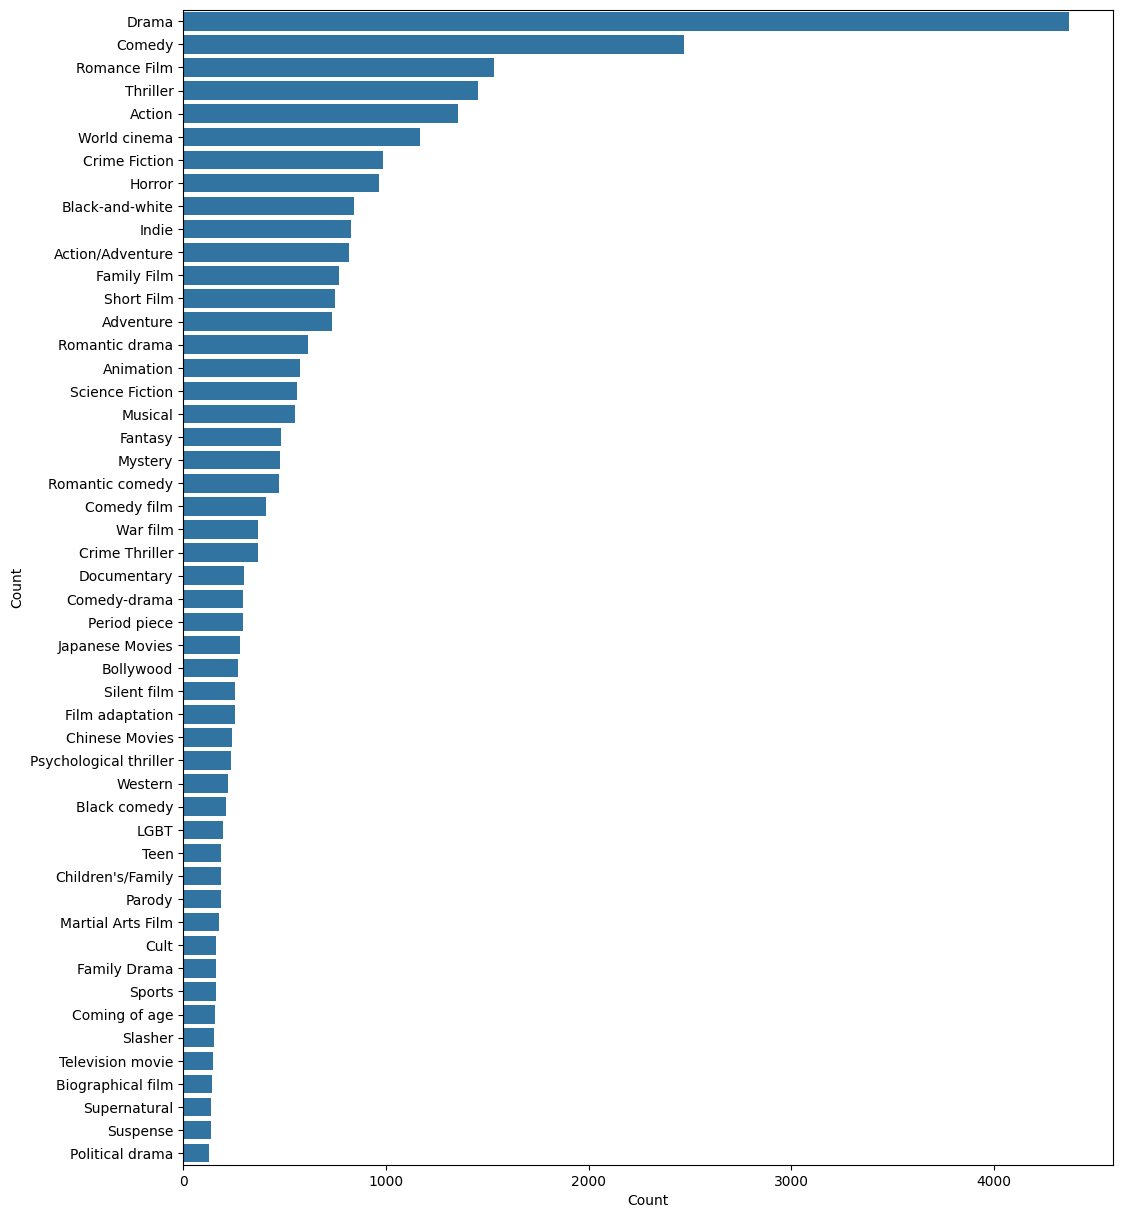

In [19]:
g = all_genres_df.nlargest(columns="Count", n = 50)
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Count')
# from google.colab import files
plt.savefig("genre_freq.png")
# files.download("genre_freq.png")
plt.show()

In [20]:
pip install wordcloud

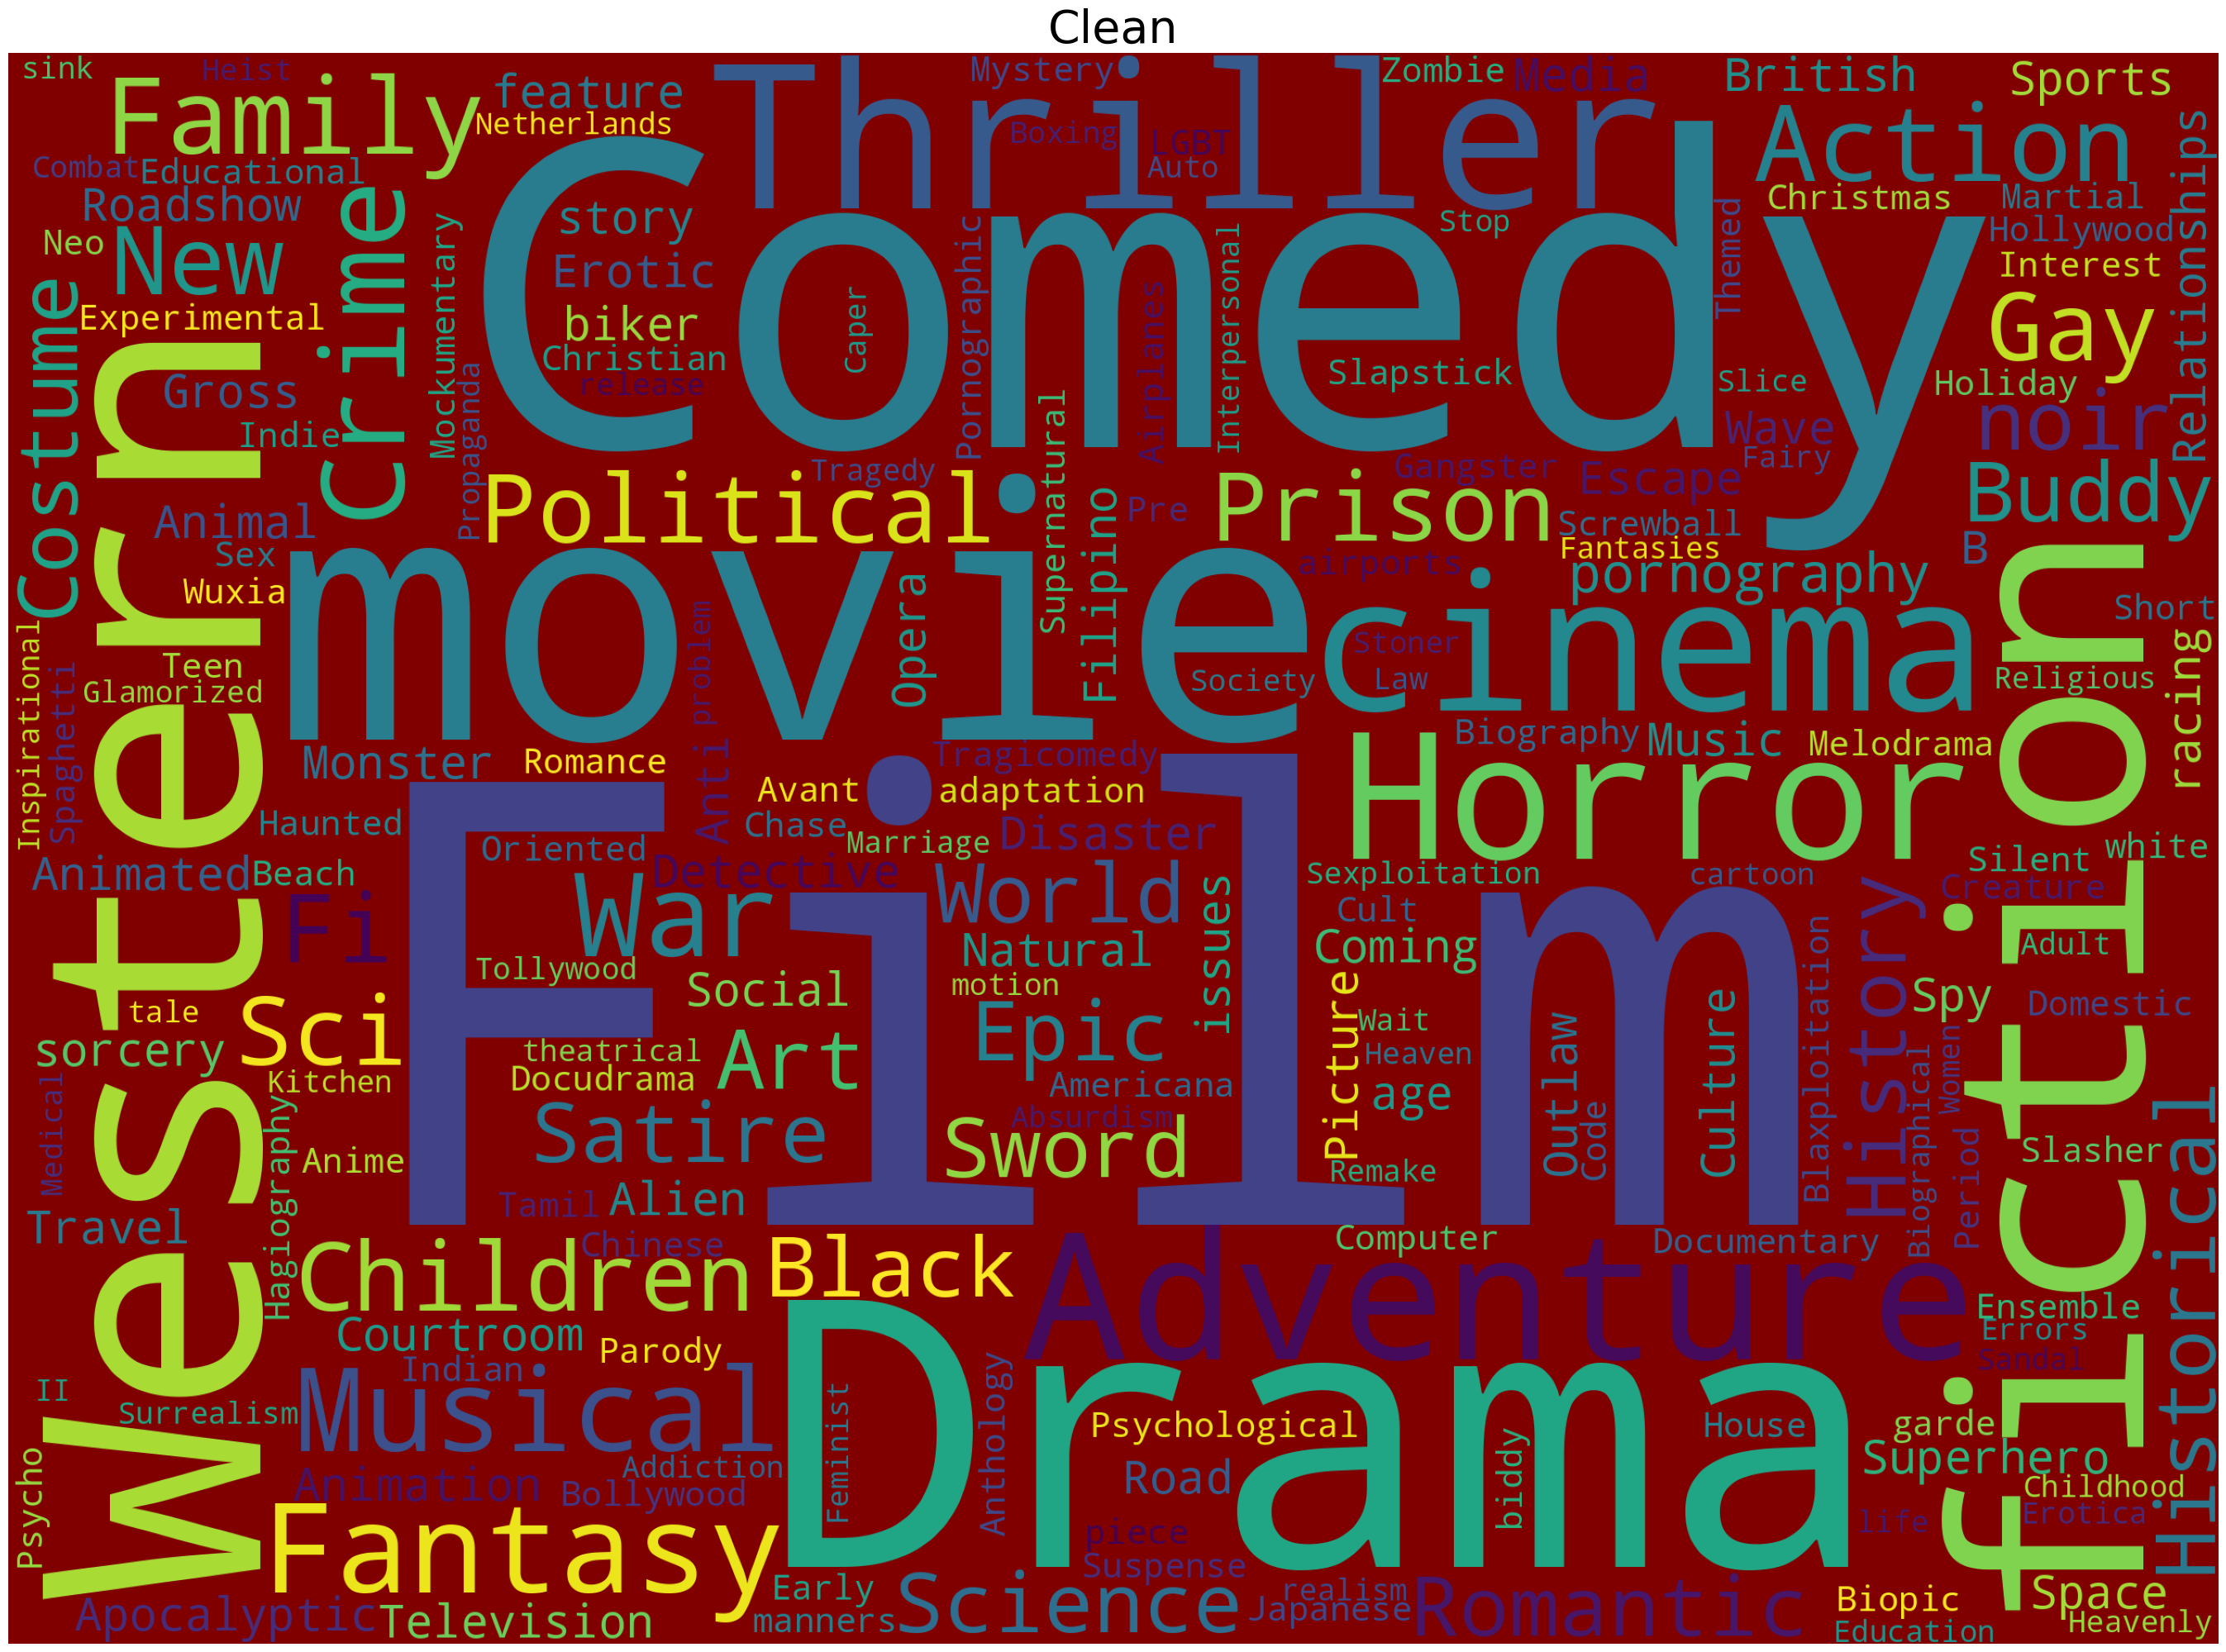

In [21]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))

genres_cloud = WordCloud(

                          background_color='maroon',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(all_genres_df['Genre']))
plt.axis('off')
plt.title("Clean",fontsize=40)

plt.imshow(genres_cloud)
plt.savefig("genre_wordcloud.png")
# files.download("genre_wordcloud.png")

In [22]:
def clean_text(text):
    # remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()

    return text

In [23]:
movies_new['clean_plot']=movies_new['plot'].apply(lambda x:clean_text(x))
movies_new.head()

<ipython-input-23-9327377fe9a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new['clean_plot']=movies_new['plot'].apply(lambda x:clean_text(x))


movie_id  \
0  23890098   
1  31186339   
2  20663735   
3   2231378   
4    595909   

                                                                                                                                                                                                                                                                                                          plot  \
0                                                                                                                           Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.   
1  The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...   
2  Poovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had e...   
3  The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...   
4  Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...   

           movie_name  \
0          Taxi Blues   
1    The Hunger Games   
2          Narasimham   
3  The Lemon Drop Kid   
4   A Cry in the Dark   

                                                                                                                                          genre  \
0                                                                                          {"/m/07s9rl0": "Drama", "/m/03q4nz": "World cinema"}   
1                              {"/m/03btsm8": "Action/Adventure", "/m/06n90": "Science Fiction", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama"}   
2                                               {"/m/04t36": "Musical", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama", "/m/01chg": "Bollywood"}   
3                                                                                        {"/m/06qm3": "Screwball comedy", "/m/01z4y": "Comedy"}   
4  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama", "/m/01f9r0": "Docudrama", "/m/03q4nz": "World cinema", "/m/05bh16v": "Courtroom Drama"}   

                                                          genre_new  \
0                                             [Drama, World cinema]   
1                [Action/Adventure, Science Fiction, Action, Drama]   
2                               [Musical, Action, Drama, Bollywood]   
3                                        [Screwball comedy, Comedy]   
4  [Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]   

                                                                                                                                                                                                                                                                                                    clean_plot  
0                                                                                                                                  shlykov a hard working taxi driver and lyosha a saxophonist develop a bizarre love hate relationship and despite their prejudices realize they arent so different after all  
1  t

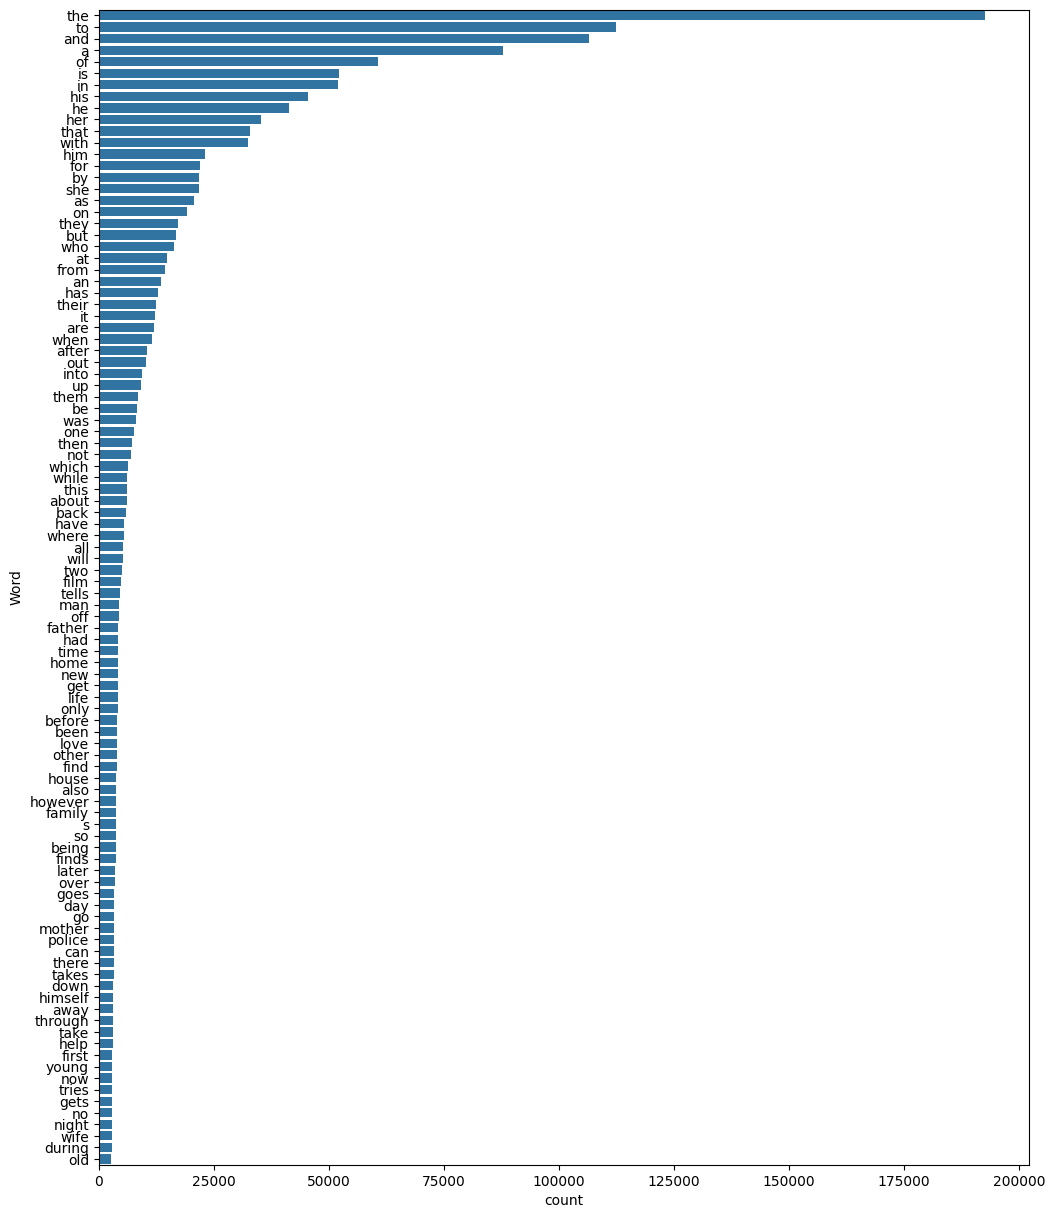

In [24]:

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)

  # visualize words and frequencies
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.savefig("word_freq.png")
  # files.download("word_freq.png")
  plt.show()

# print 100 most frequent words
freq_words(movies_new['clean_plot'], 100)

In [25]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
pd.set_option('mode.chained_assignment', None)
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))

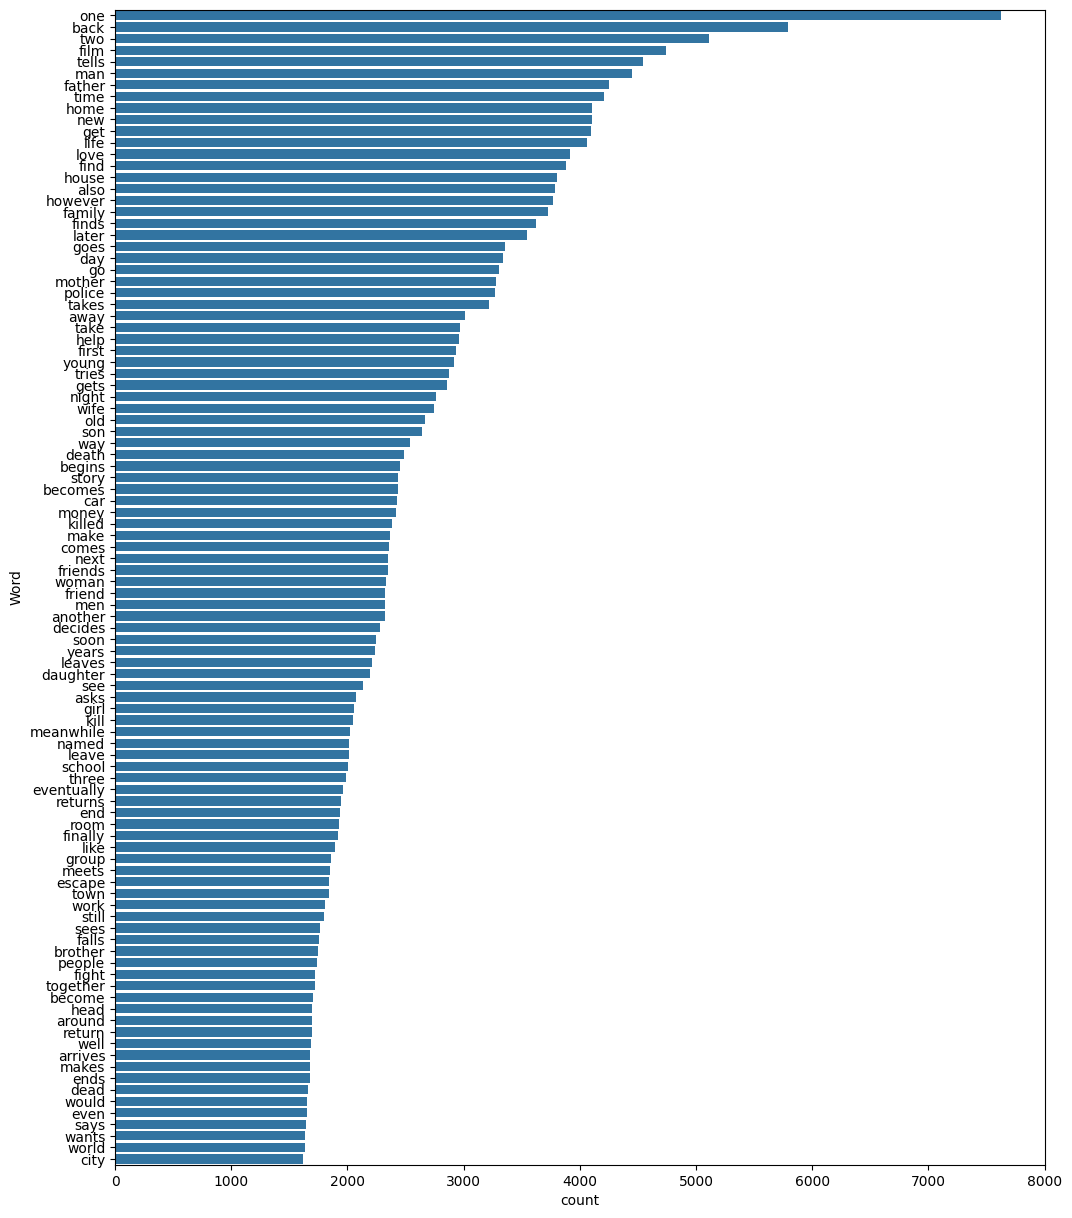

In [27]:
freq_words(movies_new['clean_plot'], 100)


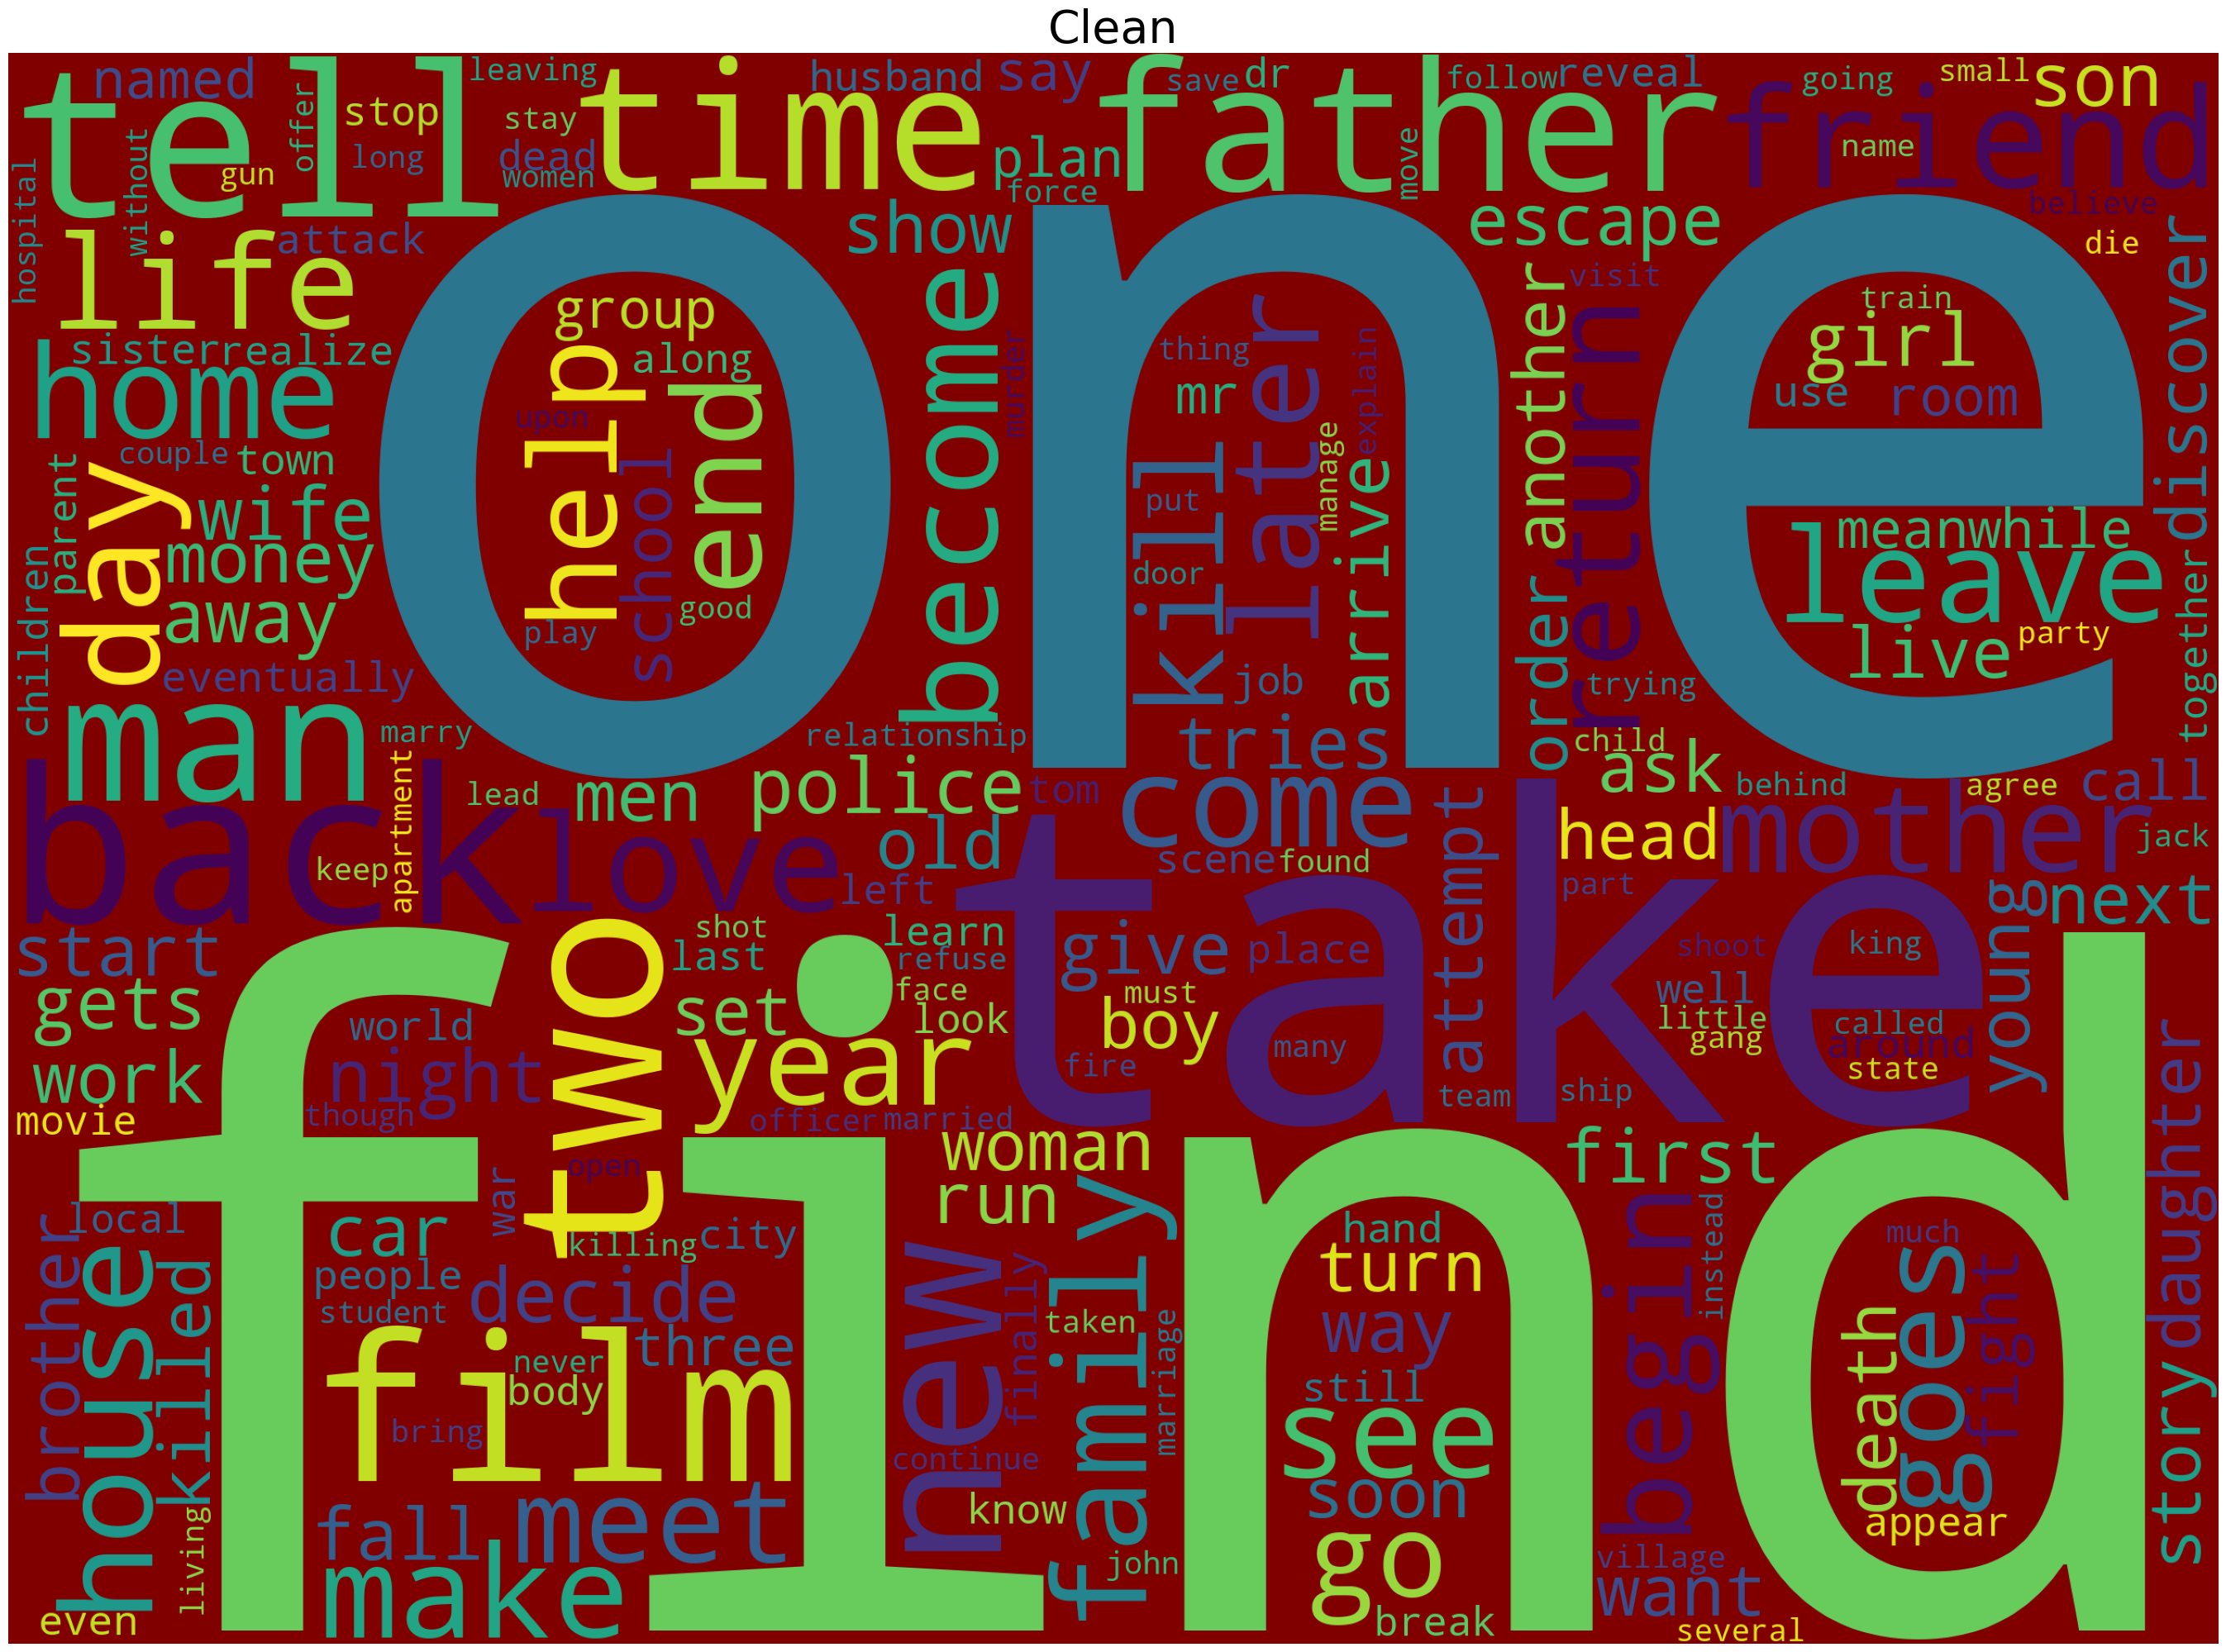

In [28]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# clean

cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='maroon',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(movies_new['clean_plot']))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)
plt.savefig("word_wordcloud.png")
# files.download("word_wordcloud.png")

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
porter=PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)


In [31]:
movies_new['stem_plot'] = movies_new['clean_plot'].apply(lambda x: stemSentence(x))

In [32]:
movies_new.head()

movie_id  \
0  23890098   
1  31186339   
2  20663735   
3   2231378   
4    595909   

                                                                                                                                                                                                                                                                                                          plot  \
0                                                                                                                           Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.   
1  The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...   
2  Poovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had e...   
3  The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...   
4  Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...   

           movie_name  \
0          Taxi Blues   
1    The Hunger Games   
2          Narasimham   
3  The Lemon Drop Kid   
4   A Cry in the Dark   

                                                                                                                                          genre  \
0                                                                                          {"/m/07s9rl0": "Drama", "/m/03q4nz": "World cinema"}   
1                              {"/m/03btsm8": "Action/Adventure", "/m/06n90": "Science Fiction", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama"}   
2                                               {"/m/04t36": "Musical", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama", "/m/01chg": "Bollywood"}   
3                                                                                        {"/m/06qm3": "Screwball comedy", "/m/01z4y": "Comedy"}   
4  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama", "/m/01f9r0": "Docudrama", "/m/03q4nz": "World cinema", "/m/05bh16v": "Courtroom Drama"}   

                                                          genre_new  \
0                                             [Drama, World cinema]   
1                [Action/Adventure, Science Fiction, Action, Drama]   
2                               [Musical, Action, Drama, Bollywood]   
3                                        [Screwball comedy, Comedy]   
4  [Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]   

                                                                                                                                                                                                                                                                                                    clean_plot  \
0                                                                                                                                                                        shlykov hard working taxi driver lyosha saxophonist develop bizarre love hate relationship despite prejudices realize arent different   
1 

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(movies_new['genre_new'])

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score

In [35]:
xtrain, xval, ytrain, yval = train_test_split(movies_new['clean_plot'], y, test_size=0.2, random_state=9)


In [36]:
def classification(vectorizer,classifier):
  if(vectorizer=='tfidf'):
    vect=TfidfVectorizer(max_df=0.8,max_features=1000)
  else:
    vect=CountVectorizer(max_df=0.8,max_features=1000)
  xtrain_tfidf = vect.fit_transform(xtrain)
  xval_tfidf = vect.transform(xval)
  lr=LogisticRegression()
  if(classifier=='logisticregression'):
    lr = LogisticRegression()
  elif(classifier=='multinomialnb'):
    lr=MultinomialNB()
  elif(classifier=='decisiontree'):
    lr=DecisionTreeClassifier()
  elif(classifier=='sgd'):
    lr=SGDClassifier()
  clf = OneVsRestClassifier(lr)
  clf.fit(xtrain_tfidf, ytrain)
  y_pred = clf.predict(xval_tfidf)
  pred=clf.predict(xtrain_tfidf)
  y_pred_prob = clf.predict(xval_tfidf)
  f1score=f1_score(yval, y_pred, average="micro")
  t = 0.3 # threshold value
  y_pred_new = (y_pred_prob >= t).astype(int)
  f1score_threshold=f1_score(yval, y_pred_new, average="micro")
  precision=precision_score(yval,y_pred_new,average='micro')
  recall=recall_score(yval, y_pred_new,average='micro')
  acc=accuracy_score(ytrain,pred)*1000
  print()
  print("Using "+vectorizer+" and "+ classifier)
  print()
  print("Precision: "+str(precision))
  print()
  print("Recall: "+str(recall))
  print()
  print("F1-score: "+str(f1score_threshold))
  print()
  # print("Hamming Loss: "+str(hamming_loss(yval,y_pred_new)))

  print()


In [37]:
classification("tfidf","logisticregression")

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 42 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 132 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 143 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 154 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 187 is present in all training e


Using tfidf and logisticregression

Precision: 0.6525146962769431

Recall: 0.14541484716157205

F1-score: 0.23782882990120224




In [38]:
classification("countvectorizer","logisticregression")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Using countvectorizer and logisticregression

Precision: 0.36951452194191226

Recall: 0.2537117903930131

F1-score: 0.30085440579960304




In [39]:
classification("tfidf","multinomialnb")
classification("countvectorizer","multinomialnb")

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 42 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 132 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 143 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 154 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 187 is present in all training e


Using tfidf and multinomialnb

Precision: 0.655937846836848

Recall: 0.08602620087336245

F1-score: 0.15210397632222367




/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 42 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 132 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 143 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 154 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 187 is present in all training e


Using countvectorizer and multinomialnb

Precision: 0.22378188689431772

Recall: 0.4826783114992722

F1-score: 0.3057912209516784




In [40]:
classification("tfidf","sgd")
classification("countvectorizer","sgd")

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 42 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 132 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 143 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 154 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 187 is present in all training e


Using tfidf and sgd

Precision: 0.6306659205372132

Recall: 0.16404657933042213

F1-score: 0.26036733279427055




/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 42 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 132 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 143 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 154 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 187 is present in all training e


Using countvectorizer and sgd

Precision: 0.2902442724927932

Recall: 0.2784570596797671

F1-score: 0.28422851199762283




In [41]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)
lr = LogisticRegression()
clfm = OneVsRestClassifier(lr)
clfm.fit(xtrain_tfidf, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 42 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 132 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 143 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 154 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 187 is present in all training e

OneVsRestClassifier(estimator=LogisticRegression())

In [42]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)

    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clfm.predict(q_vec)

    return multilabel_binarizer.inverse_transform(q_pred)

## **Testing for the movie Notebook which is a romantic film**

In [43]:
infer_tags("n 1940s South Carolina, mill worker Noah Calhoun (Ryan Gosling) and rich girl Allie (Rachel McAdams) are desperately in love. But her parents don't approve. When Noah goes off to serve in World War II, it seems to mark the end of their love affair. In the interim, Allie becomes involved with another man (James Marsden). But when Noah returns to their small town years later, on the cusp of Allie's marriage, it soon becomes clear that their romance is anything but over.")

[('Drama', 'Romance Film')]


## **Testing for the movie Evil Dead which is a horror film**

In [44]:
infer_tags(" The people start turning into evil deadites, and the others soon learn from the tape that the only way to kill a person who is turned into a deadite is by total body dismemberment. People are dying left and right; one girl early in the film looses control and runs off into the woods, only to be raped by the trees.")

[('Horror',)]

## **Testing for the movie Batman begins which is a action film**

In [45]:
infer_tags(" Summaries After training with his mentor, Batman begins his fight to free crime-ridden Gotham City from corruption. When his parents are killed, billionaire playboy Bruce Wayne relocates to Asia, where he is mentored by Henri Ducard and Ra's Al Ghul in how to fight evil.")

[('Action',)]

## **Testing for the movie Eternals which is a science fiction film**

In [46]:
infer_tags(" The Eternals, a race of immortal beings with superhuman powers who have secretly lived on Earth for thousands of years, reunite to battle the evil Deviants.")

[()]

In [47]:
infer_tags(" A legendary rivalry reemerges when Jerry moves into New York City's finest hotel on the eve of the wedding of the century, forcing the desperate event planner to hire Tom to get rid of him. As mayhem ensues, the escalating cat-and-mouse battle soon threatens to destroy her career, the wedding, and possibly the hotel itself.")

[('Comedy',)]

In [48]:
infer_tags("Two young people, Venkatesh and Nandini, get embroiled in a murder case when the strict principal is killed after he humiliates Nandini. A routine tale, the story begins with Venkata (Yash) a young student who has few issues in life. This takes a turn when he sees Nandini (Radhika) and falls for her.")

[('Drama',)]